# Aplicación de la Puerta Pauli-Y sobre el estado |+i⟩

## Estado inicial
El qubit se inicializa en el estado de superposición conocido como |+i⟩:

$$
|+i\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + i |1\rangle \right)
$$

**Amplitudes iniciales**:  
`[0.5 + 0.5j, 0.5 - 0.5j]`  
Esto corresponde a:  
$$0.5|0\rangle + 0.5i|1\rangle$$

En la esfera de Bloch, este estado se encuentra en el **polo este** (eje +Y positivo).

## Acción de la puerta Pauli-Y
La matriz de la puerta Pauli-Y es:

$$
Y = \begin{pmatrix} 
0 & -i \\ 
i & 0 
\end{pmatrix}
$$

Al aplicarla sobre el estado |+i⟩ obtenemos:

$$
Y |+i\rangle = \begin{pmatrix} 
0 & -i \\ 
i & 0 
\end{pmatrix}
\frac{1}{\sqrt{2}} \begin{pmatrix} 
1 \\ 
i 
\end{pmatrix}
= \frac{1}{\sqrt{2}} \begin{pmatrix} 
-i \cdot i \\ 
i \cdot 1 
\end{pmatrix}
= \frac{1}{\sqrt{2}} \begin{pmatrix} 
1 \\ 
i 
\end{pmatrix}
= -i \cdot \frac{1}{\sqrt{2}} \begin{pmatrix} 
1 \\ 
i 
\end{pmatrix}
= -i \, |+i\rangle
$$

Por lo tanto, el estado final es:

$$
|ψ\rangle = (0.500 - 0.500j)|0\rangle + (0.500 + 0.500j)|1\rangle
$$

**Nota importante**: El factor -i es una **fase global**. Las fases globales no afectan las probabilidades de medición ni las propiedades físicas observables del estado. Por eso, el estado resultante es físicamente equivalente al estado inicial |+i⟩.

## Probabilidades de medición
Al medir en la base computacional:

- $$P(|0\rangle) = |0.5 - 0.5j|^2 = 0.25 + 0.25 = 0.5 \rightarrow 50.0\%$$
- $$P(|1\rangle) = |0.5 + 0.5j|^2 = 0.25 + 0.25 = 0.5 \rightarrow 50.0\%$$

El resultado de la medición es completamente aleatorio: 50% de probabilidad para cada resultado.

## Interpretación geométrica en la esfera de Bloch
- El estado |+i⟩ se representa como un vector en el ecuador de la esfera de Bloch, apuntando hacia el **eje +Y**.
- La puerta Pauli-Y realiza una **rotación de 180° alrededor del eje Y**.
- Al rotar 180° alrededor del mismo eje en el que apunta el vector, este vuelve exactamente al mismo punto (solo cambia la fase global).

Por eso, visualmente, el vector de Bloch permanece en la misma posición después de aplicar Y.

## Simulación experimental
Aunque teóricamente las probabilidades son exactamente 50%/50%, ejecutamos el circuito muchas veces (shots = 1024) en un simulador ideal para obtener estadísticas.

En un simulador sin ruido:
- Esperamos aproximadamente la mitad de los shots en |0⟩ y la otra mitad en |1⟩.
- Ejemplo típico de resultado:
  - |0⟩ ≈ 512 veces (≈50%)
  - |1⟩ ≈ 512 veces (≈50%)

El histograma muestra dos barras prácticamente iguales.



=== APLICACIÓN DE LA PUERTA PAULI-Y SOBRE EL ESTADO |+i⟩ ===

Estado inicial del qubit: |+i⟩ = (1/√2)|0⟩ + (i/√2)|1⟩
Amplitudes iniciales: [0.5 + 0.5j, 0.5 - 0.5j]

Circuito cuántico:


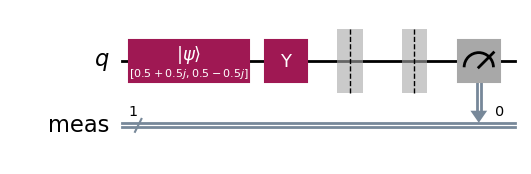


=== RESULTADO TEÓRICO ===
Statevector final: [-0.5-0.5j -0.5+0.5j]
Estado resultante: |ψ⟩ = (-0.500-0.500j)|0⟩ + (-0.500+0.500j)|1⟩
Transformación: Y |+i⟩ = -i |+i⟩ → fase global -i (equivalente a |+i⟩ hasta fase)

Probabilidades teóricas:
P(|0⟩) = 0.500 → 50.0%
P(|1⟩) = 0.500 → 50.0%

=== RESULTADO EXPERIMENTAL ===

Resultados de simulación (1024 shots):
|0⟩:  512 veces (50.0%) ─ Teórico: 50.0%
|1⟩:  512 veces (50.0%) ─ Teórico: 50.0%

Distribución de resultados:


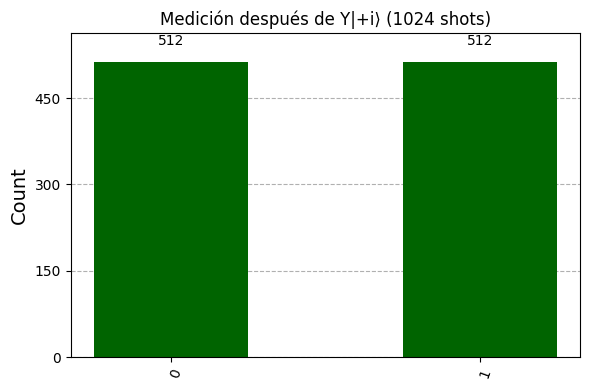

In [1]:
# Importar librerías necesarias
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

print("=== APLICACIÓN DE LA PUERTA PAULI-Y SOBRE EL ESTADO |+i⟩ ===\n")

print("Estado inicial del qubit: |+i⟩ = (1/√2)|0⟩ + (i/√2)|1⟩")
print("Amplitudes iniciales: [0.5 + 0.5j, 0.5 - 0.5j]\n")

# Circuito teórico (sin medición)
qc = QuantumCircuit(1)
qc.initialize([0.5 + 0.5j, 0.5 - 0.5j], 0)  # Inicializar en |+i⟩
qc.y(0)  # Aplicar puerta Pauli-Y

# Circuito para simulación (con medición)
qc_sim = qc.copy()
qc_sim.barrier()
qc_sim.measure_all()

# Mostrar circuito gráfico
print("Circuito cuántico:")
display(qc_sim.draw(output='mpl'))
print()

# ========================
# RESULTADO TEÓRICO
# ========================
print("=== RESULTADO TEÓRICO ===")
sv = Statevector.from_instruction(qc)
print(f"Statevector final: {sv.data}")

# Formato bonito con signo + explícito en parte imaginaria
a0 = sv.data[0]
a1 = sv.data[1]
print(f"Estado resultante: |ψ⟩ = ({a0.real:.3f}{a0.imag:+.3f}j)|0⟩ + ({a1.real:.3f}{a1.imag:+.3f}j)|1⟩")
print("Transformación: Y |+i⟩ = -i |+i⟩ → fase global -i (equivalente a |+i⟩ hasta fase)\n")

probs = sv.probabilities_dict()
print("Probabilidades teóricas:")
for state in ['0', '1']:
    p = probs.get(state, 0.0)
    print(f"P(|{state}⟩) = {p:.3f} → {p:.1%}")

# ========================
# RESULTADO EXPERIMENTAL
# ========================
print("\n=== RESULTADO EXPERIMENTAL ===")
shots = 1024
simulator = AerSimulator()
result = simulator.run(qc_sim, shots=shots).result()
counts = result.get_counts()

print(f"\nResultados de simulación ({shots} shots):")
for state in ['0', '1']:
    count = counts.get(state, 0)
    prob_exp = count / shots
    prob_teo = probs.get(state, 0.0)
    print(f"|{state}⟩: {count:4d} veces ({prob_exp:.1%}) ─ Teórico: {prob_teo:.1%}")

# Histograma
print("\nDistribución de resultados:")
display(plot_histogram(counts, 
                      title=f"Medición después de Y|+i⟩ ({shots} shots)",
                      color='darkgreen',
                      figsize=(6, 4)))

# Aplicación de la Puerta Pauli-Z sobre el estado |+⟩

## Estado inicial
El qubit se inicializa en el estado de superposición equilibrada conocido como |+⟩:

$$
|+⟩ = \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right)
$$

**Amplitudes iniciales**:  
`[0.707 + 0j, 0.707 + 0j]` ≈ `[1/√2, 1/√2]`

En la esfera de Bloch, este estado se encuentra en el **polo este** (eje +X positivo).

## Acción de la puerta Pauli-Z
La matriz de la puerta Pauli-Z es:

$$
Z = \begin{pmatrix} 
1 & 0 \\ 
0 & -1 
\end{pmatrix}
$$

Al aplicarla sobre |+⟩:

$$
Z |+⟩ = \frac{1}{\sqrt{2}} \begin{pmatrix} 
1 & 0 \\ 
0 & -1 
\end{pmatrix}
\begin{pmatrix} 
1 \\ 
1 
\end{pmatrix}
= \frac{1}{\sqrt{2}} \begin{pmatrix} 
1 \\ 
-1 
\end{pmatrix}
= \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right) = |-\rangle
$$

**Statevector final** (ejemplo típico):
[ 0.707+0j, -0.707+0j ]


**Estado resultante**:
$$
|ψ⟩ = (0.707 + 0.000j)|0⟩ + (-0.707 + 0.000j)|1⟩ = |-\rangle
$$

Esto introduce una **fase relativa** de π (180°) entre |0⟩ y |1⟩, convirtiendo |+⟩ en su ortogonal |−⟩.

## Probabilidades de medición
Al medir en la base computacional:

- $$P(|0\rangle) = \left|\frac{1}{\sqrt{2}}\right|^2 = 0.5 \rightarrow 50.0\%$$
- $$P(|1\rangle) = \left|\frac{-1}{\sqrt{2}}\right|^2 = 0.5 \rightarrow 50.0\%$$

Las probabilidades son idénticas a las del estado inicial |+⟩: **50%/50%**.

## Interpretación geométrica en la esfera de Bloch
- El estado |+⟩ apunta al eje +X.
- La puerta Pauli-Z realiza una **rotación de 180° alrededor del eje Z**.
- Esto lleva el vector de Bloch del polo +X al polo **−X**, que corresponde exactamente al estado |−⟩.

A diferencia de las fases globales, las **fases relativas** sí son observables y cambian la dirección del vector de Bloch.

## Simulación experimental
En un simulador ideal con 1024 shots:

- Se obtienen aproximadamente la mitad de |0⟩ y la mitad de |1⟩.
- Ejemplo típico:
  - |0⟩ ≈ 512 veces (≈50%)
  - |1⟩ ≈ 512 veces (≈50%)

El histograma muestra dos barras prácticamente iguales, igual que si midiéramos directamente |+⟩.



=== APLICACIÓN DE LA PUERTA PAULI-Z SOBRE EL ESTADO |+⟩ ===

Estado inicial del qubit: |+⟩ = (1/√2)|0⟩ + (1/√2)|1⟩
Amplitudes iniciales: [0.707 + 0j, 0.707 + 0j] ≈ [1/√2, 1/√2]

Circuito cuántico:


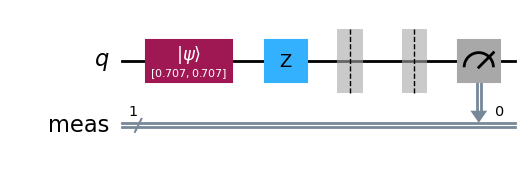


=== RESULTADO TEÓRICO ===
Statevector final: [ 0.70710678+0.j -0.70710678+0.j]
Estado resultante: |ψ⟩ = (0.707+0.000j)|0⟩ + (-0.707+0.000j)|1⟩
Transformación: Z |+⟩ = |−⟩

Probabilidades teóricas:
P(|0⟩) = 0.500 → 50.0%
P(|1⟩) = 0.500 → 50.0%

=== RESULTADO EXPERIMENTAL ===

Resultados de simulación (1024 shots):
|0⟩:  530 veces (51.8%) ─ Teórico: 50.0%
|1⟩:  494 veces (48.2%) ─ Teórico: 50.0%

Distribución de resultados:


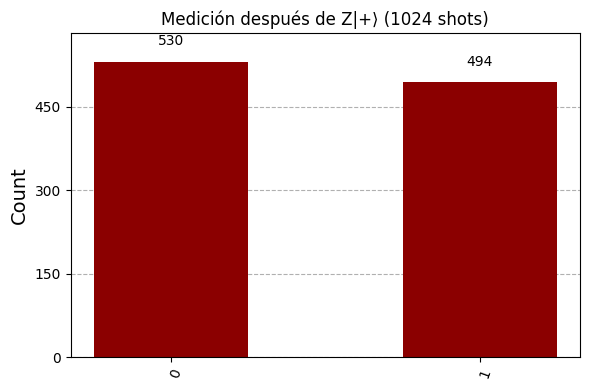

In [2]:
# Importar librerías necesarias
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

print("=== APLICACIÓN DE LA PUERTA PAULI-Z SOBRE EL ESTADO |+⟩ ===\n")

print("Estado inicial del qubit: |+⟩ = (1/√2)|0⟩ + (1/√2)|1⟩")
print("Amplitudes iniciales: [0.707 + 0j, 0.707 + 0j] ≈ [1/√2, 1/√2]\n")

# Circuito teórico (sin medición)
qc = QuantumCircuit(1)
qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)  # Inicializar en |+⟩
qc.z(0)  # Aplicar puerta Pauli-Z

# Circuito para simulación experimental
qc_sim = qc.copy()
qc_sim.barrier()
qc_sim.measure_all()

# Mostrar circuito gráfico
print("Circuito cuántico:")
display(qc_sim.draw(output='mpl'))
print()

# ========================
# RESULTADO TEÓRICO
# ========================
print("=== RESULTADO TEÓRICO ===")
sv = Statevector.from_instruction(qc)
print(f"Statevector final: {sv.data}")

# Formato bonito con signo + explícito
a0 = sv.data[0]
a1 = sv.data[1]
print(f"Estado resultante: |ψ⟩ = ({a0.real:.3f}{a0.imag:+.3f}j)|0⟩ + ({a1.real:.3f}{a1.imag:+.3f}j)|1⟩")
print("Transformación: Z |+⟩ = |−⟩\n")

probs = sv.probabilities_dict()
print("Probabilidades teóricas:")
for state in ['0', '1']:
    p = probs.get(state, 0.0)
    print(f"P(|{state}⟩) = {p:.3f} → {p:.1%}")

# ========================
# RESULTADO EXPERIMENTAL
# ========================
print("\n=== RESULTADO EXPERIMENTAL ===")
shots = 1024
simulator = AerSimulator()
result = simulator.run(qc_sim, shots=shots).result()
counts = result.get_counts()

print(f"\nResultados de simulación ({shots} shots):")
for state in ['0', '1']:
    count = counts.get(state, 0)
    prob_exp = count / shots
    prob_teo = probs.get(state, 0.0)
    print(f"|{state}⟩: {count:4d} veces ({prob_exp:.1%}) ─ Teórico: {prob_teo:.1%}")

# Histograma
print("\nDistribución de resultados:")
display(plot_histogram(counts, 
                      title=f"Medición después de Z|+⟩ ({shots} shots)",
                      color='darkred',
                      figsize=(6, 4)))